In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
# Load the data from the CSV file

output_directory = './img/'
df = pd.read_csv('output.csv')
df['Iteration'] = df['InputFileName'].str.extract(r'(\d+)-')
# datetime = "Scenario 3 - 14-11-23T20-00-54"

In [17]:
df


,InputFileName,Architecture,ExperimentDate,ScenarioPath,NumberOfInstances,SleepTime,WorkloadIterations,NumberOfIterations,StartTimestamp,MonolithExperiment,...,SEN2,SEN3,x86_pk,pch_ca,iwlwif,INT340,SEN4,CPU,Freq,Iteration
0,29-frontend-monitor.csv,micro,09-12-23T06-28-39,3,5,300,50,30,09-12-23T06-28-39,10-12-23T04-22-06,...,20.05,23.05,25.0,20.0,21.0,20.0,21.05,1.10,GHz,29
1,29-frontend-monitor.csv,micro,09-12-23T06-28-39,3,5,300,50,30,09-12-23T06-28-39,10-12-23T04-22-06,...,19.05,23.05,25.0,22.0,21.0,20.0,21.05,1.35,GHz,29
2,29-frontend-monitor.csv,micro,09-12-23T06-28-39,3,5,300,50,30,09-12-23T06-28-39,10-12-23T04-22-06,...,19.05,23.05,25.0,20.0,21.0,20.0,21.05,1.10,GHz,29
3,29-frontend-monitor.csv,micro,09-12-23T06-28-39,3,5,300,50,30,09-12-23T06-28-39,10-12-23T04-22-06,...,19.05,23.05,24.0,22.0,21.0,20.0,21.05,1.20,GHz,29
4,29-frontend-monitor.csv,micro,09-12-23T06-28-39,3,5,300,50,30,09-12-23T06-28-39,10-12-23T04-22-06,...,19.05,23.05,24.0,22.0,21.0,20.0,21.05,1.23,GHz,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118495,7-api-monitor.csv,mono,06-12-23T12-48-30,1,5,300,50,30,06-12-23T12-48-30,07-12-23T04-21-28,...,20.05,23.05,26.0,21.0,21.0,20.0,21.05,1.42,GHz,7
118496,7-api-monitor.csv,mono,06-12-23T12-48-30,1,5,300,50,30,06-12-23T12-48-30,07-12-23T04-21-28,...,20.05,23.05,25.0,21.0,21.0,20.0,21.05,1.27,GHz,7
118497,7-api-monitor.csv,mono,06-12-23T12-48-30,1,5,300,50,30,06-12-23T12-48-30,07-12-23T04-21-28,...,20.05,23.05,26.0,20.0,21.0,20.0,21.05,1.25,GHz,7
118498,7-api-monitor.csv,mono,06-12-23T12-48-30,1,5,300,50,30,06-12-23T12-48-30,07-12-23T04-21-28,...,20.05,23.05,25.0,21.0,21.0,20.0,21.05,1.48,GHz,7


/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/2142213439.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars


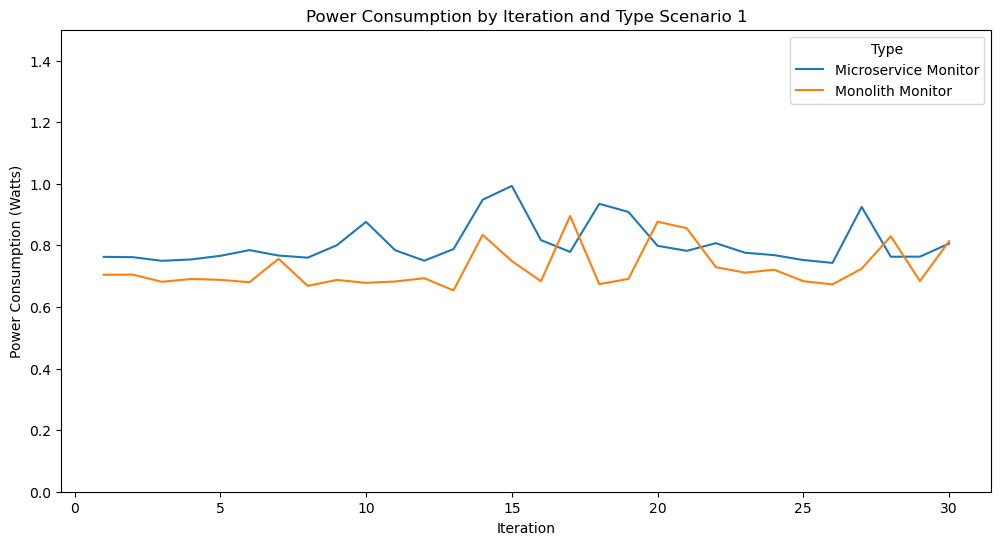

In [5]:
scenario = 1

filtered_df = df[df['ScenarioPath'] == scenario]
filtered_df_mono = filtered_df[filtered_df['Architecture'] == 'mono']
filtered_df_mono_monitor = filtered_df_mono[filtered_df_mono['InputFileName'].str.contains(r'monitor')]

filtered_df_micro = filtered_df[filtered_df['Architecture'] == 'micro']
filtered_df_micro_monitor = filtered_df_micro[filtered_df_micro['InputFileName'].str.contains(r'monitor')]


# Combine the relevant dataframes
combined_df = pd.concat([
    filtered_df_micro_monitor.assign(Type='Microservice Monitor'),
    filtered_df_mono_monitor.assign(Type='Monolith Monitor'),
])

# Extract the iteration number
combined_df['Iteration'] = combined_df['InputFileName'].str.extract(r'(\d+)-').astype(int)

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars
plt.xlabel('Iteration')
# set the y limit
plt.ylim(0, 1.5)
plt.ylabel('Power Consumption (Watts)')
plt.title('Power Consumption by Iteration and Type Scenario ' + str(scenario))

plt.savefig(os.path.join(output_directory, 'power_by_iterations_scenario' + str(scenario)), bbox_inches='tight', dpi=300)
plt.show()


/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/1389554536.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars


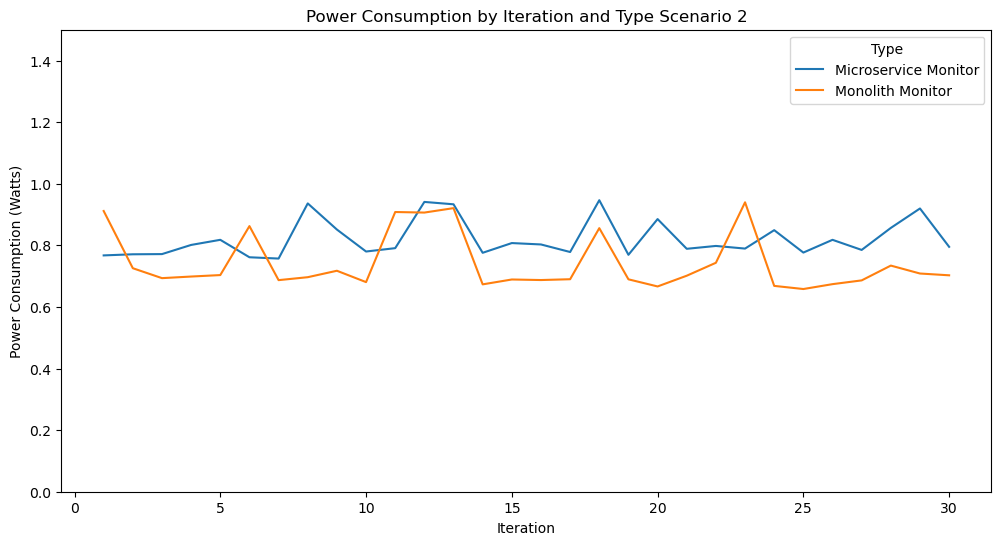

In [6]:
scenario = 2

filtered_df = df[df['ScenarioPath'] == scenario]
filtered_df_mono = filtered_df[filtered_df['Architecture'] == 'mono']
filtered_df_mono_monitor = filtered_df_mono[filtered_df_mono['InputFileName'].str.contains(r'monitor')]

filtered_df_micro = filtered_df[filtered_df['Architecture'] == 'micro']
filtered_df_micro_monitor = filtered_df_micro[filtered_df_micro['InputFileName'].str.contains(r'monitor')]


# Combine the relevant dataframes
combined_df = pd.concat([
    filtered_df_micro_monitor.assign(Type='Microservice Monitor'),
    filtered_df_mono_monitor.assign(Type='Monolith Monitor'),
])

# Extract the iteration number
combined_df['Iteration'] = combined_df['InputFileName'].str.extract(r'(\d+)-').astype(int)

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars
plt.xlabel('Iteration')
# set the y limit
plt.ylim(0, 1.5)
plt.ylabel('Power Consumption (Watts)')
plt.title('Power Consumption by Iteration and Type Scenario ' + str(scenario))

plt.savefig(os.path.join(output_directory, 'power_by_iterations_scenario' + str(scenario)), bbox_inches='tight', dpi=300)
plt.show()


/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/3080533833.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars


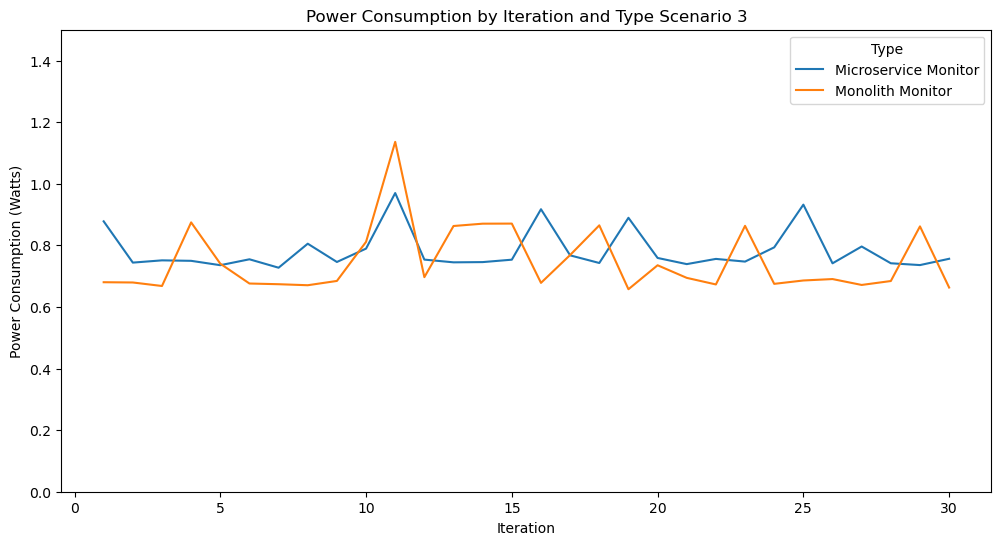

In [15]:

scenario = 3
filtered_df = df[df['ScenarioPath'] == scenario]
filtered_df_mono = filtered_df[filtered_df['Architecture'] == 'mono']
filtered_df_mono_monitor = filtered_df_mono[filtered_df_mono['InputFileName'].str.contains(r'monitor')]

filtered_df_micro = filtered_df[filtered_df['Architecture'] == 'micro']
filtered_df_micro_monitor = filtered_df_micro[filtered_df_micro['InputFileName'].str.contains(r'monitor')]


# Combine the relevant dataframes
combined_df = pd.concat([
    filtered_df_micro_monitor.assign(Type='Microservice Monitor'),
    filtered_df_mono_monitor.assign(Type='Monolith Monitor'),
])

# Extract the iteration number
combined_df['Iteration'] = combined_df['InputFileName'].str.extract(r'(\d+)-').astype(int)

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars
plt.xlabel('Iteration')
# set the y limit
plt.ylim(0, 1.5)
plt.ylabel('Power Consumption (Watts)')
plt.title('Power Consumption by Iteration and Type Scenario ' + str(scenario))

plt.savefig(os.path.join(output_directory, 'power_by_iterations_scenario' + str(scenario)), bbox_inches='tight', dpi=300)
plt.show()


/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/3041813604.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars


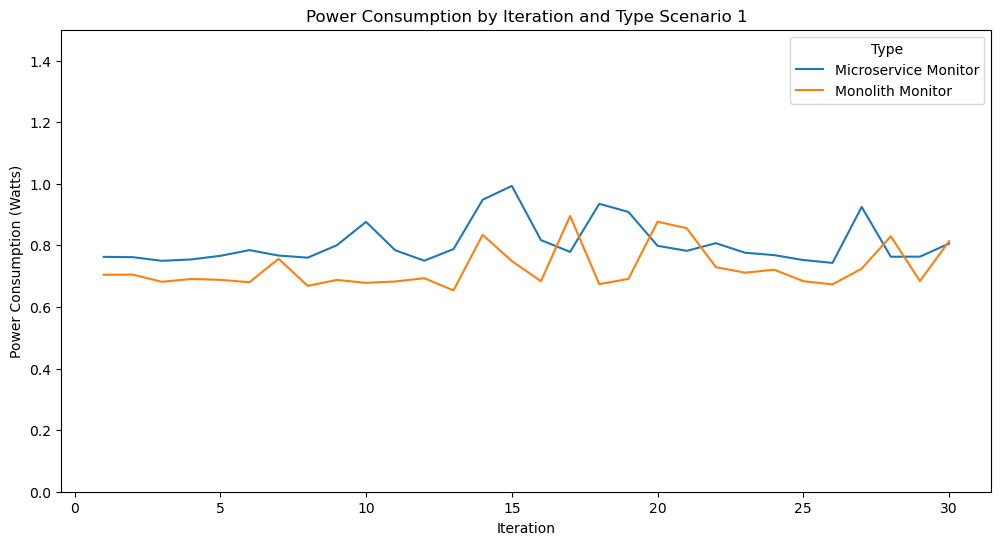

In [16]:

scenario = 1
filtered_df = df[df['ScenarioPath'] == scenario]
filtered_df_mono = filtered_df[filtered_df['Architecture'] == 'mono']
filtered_df_mono_monitor = filtered_df_mono[filtered_df_mono['InputFileName'].str.contains(r'monitor')]

filtered_df_micro = filtered_df[filtered_df['Architecture'] == 'micro']
filtered_df_micro_monitor = filtered_df_micro[filtered_df_micro['InputFileName'].str.contains(r'monitor')]


# Combine the relevant dataframes
combined_df = pd.concat([
    filtered_df_micro_monitor.assign(Type='Microservice Monitor'),
    filtered_df_mono_monitor.assign(Type='Monolith Monitor'),
])

# Extract the iteration number
combined_df['Iteration'] = combined_df['InputFileName'].str.extract(r'(\d+)-').astype(int)

# Plot the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Iteration', y='Watts', hue='Type', data=combined_df, ci=None)  # ci='sd' for shaded error bars
plt.xlabel('Iteration')
# set the y limit
plt.ylim(0, 1.5)
plt.ylabel('Power Consumption (Watts)')
plt.title('Power Consumption by Iteration and Type Scenario ' + str(scenario))

plt.savefig(os.path.join(output_directory, 'power_by_iterations_scenario' + str(scenario)), bbox_inches='tight', dpi=300)
plt.show()


In [9]:

# Set the scenario
scenario = 3

# Filter the dataframe for the specified scenario
filtered_df = df[df['ScenarioPath'] == scenario]


# Filter the DataFrame to include only "api-baseline" and "api-monitor"
filtered_df = df[df["File"].isin(["frontend-monitor", "api-monitor"])]

# Group the filtered DataFrame by "Architecture" and "File" and sum the values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].sum().unstack(fill_value=0)

# Calculate the total of "api-baseline" and "api-monitor"
grouped_df["Total"] = grouped_df["frontend-monitor"] + grouped_df["api-monitor"]

# Plot a bar chart for each "micro" and "mono"
grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
plt.xlabel("Architecture")
plt.ylabel("Cumulative Package Energy_0 (Joules)")
plt.title("Comparison of sum of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (30 iterations)")
plt.legend(title="File")
# plt.show()

plt.savefig(os.path.join(output_directory, 'sum.png'), bbox_inches='tight', dpi=300)
plt.show()


/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/3983715628.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_micro_baseline['Type'] = 'Microservice'
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/3983715628.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_mono_baseline['Type'] = 'Monolith'
/var/folders/w4/j0dx067d6_v_bwmcgq6v985r0000gn/T/ipykernel_31105/3983715628.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

ValueError: Could not interpret input 'InputFileName'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# filtered_df = df[df["InputFileName"].isin(["frontend-monitor", "api-monitor"])]

# # Group the filtered DataFrame by "Architecture" and "File" and sum the values
# grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].sum().unstack(fill_value=0)

# # Calculate the total of "api-baseline" and "api-monitor"
# grouped_df["Total"] = grouped_df["frontend-monitor"] + grouped_df["api-monitor"]

# # Plot a bar chart for each "micro" and "mono"
# grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
# plt.xlabel("Architecture")
# plt.ylabel("Cumulative Package Energy_0 (Joules)")
# plt.title("Comparison of sum of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (30 iterations) " + datetime)
# plt.legend(title="File")
# # plt.show()
# plt.ylim(0, 45000)
# plt.savefig(os.path.join(output_directory, 'sum' + datetime + '.png'), bbox_inches='tight', dpi=300)
# plt.show()

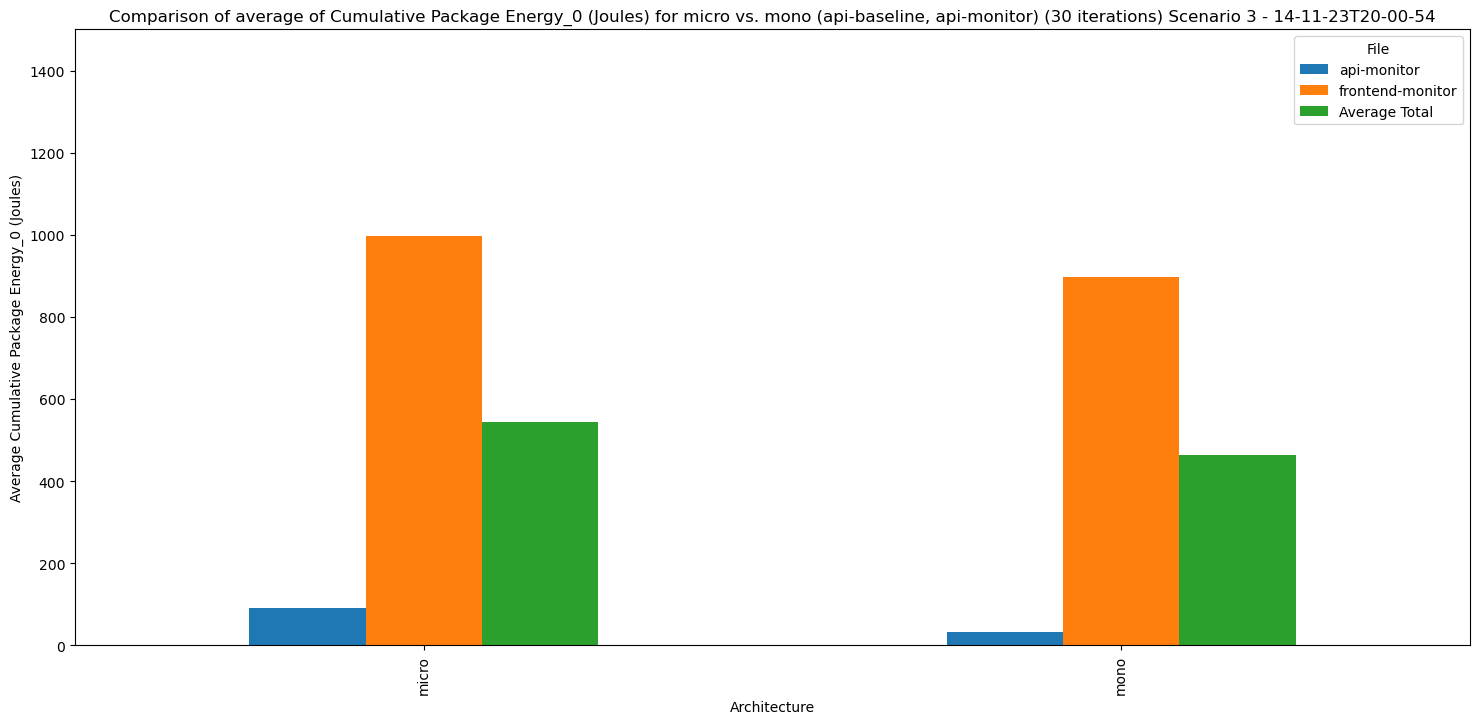

In [92]:
# Filter the DataFrame to include data only from "19-09-23T19-32-10" DateTime
# filtered_df = df[df["DateTime"] == "19-09-23T19-32-10"]

# Filter the DataFrame to exclude filenames containing the word "baseline"
filtered_df = filtered_df[~filtered_df["File"].str.contains("baseline")]

# Group the filtered DataFrame by "Architecture" and "File" and calculate the average values
grouped_df = filtered_df.groupby(["Architecture", "File"])["Cumulative Package Energy_0 (Joules)"].mean().unstack(fill_value=0)

# Calculate the average total energy consumption for each architecture
grouped_df["Average Total"] = grouped_df.mean(axis=1)

# Plot a bar chart for each "micro" and "mono" including the average total
grouped_df.plot(kind="bar", stacked=False, figsize=(18, 8))
plt.xlabel("Architecture")
plt.ylabel("Average Cumulative Package Energy_0 (Joules)")
plt.title("Comparison of average of Cumulative Package Energy_0 (Joules) for micro vs. mono (api-baseline, api-monitor) (30 iterations) " + datetime)
plt.legend(title="File")

plt.ylim(0, 1500)


plt.savefig(os.path.join(output_directory, 'average' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

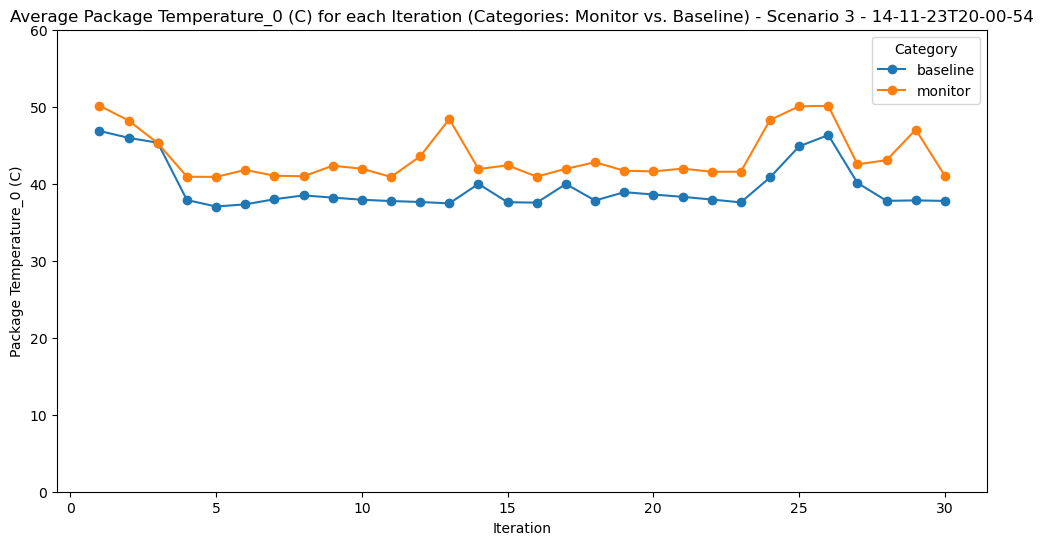

In [93]:
# Extract the category ("baseline" or "monitor") based on the "File" column
df["Category"] = df["File"].apply(lambda x: "baseline" if "baseline" in x else "monitor")

# Extract the component ("API" or "frontend") based on the "File" column
df["Component"] = df["File"].str.split("-").str[1]

# Group by "#", "Category", and "Component" and sum the " Package Temperature_0 (C)" values
grouped_df = df.groupby(["#", "Category", "Component"])[" Package Temperature_0 (C)"].mean().reset_index()

# Pivot the grouped data to create separate columns for "monitor" and "baseline" categories
pivoted_df = grouped_df.pivot_table(index="#", columns="Category", values=" Package Temperature_0 (C)", aggfunc="mean")

# Plot a line chart for "monitor" and "baseline" Package Temperature_0 (C) at each unique iteration
pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("Average Package Temperature_0 (C) for each Iteration (Categories: Monitor vs. Baseline) - " + datetime)

plt.legend(title="Category")

plt.ylim(0, 60)

plt.savefig(os.path.join(output_directory, 'average_temp' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

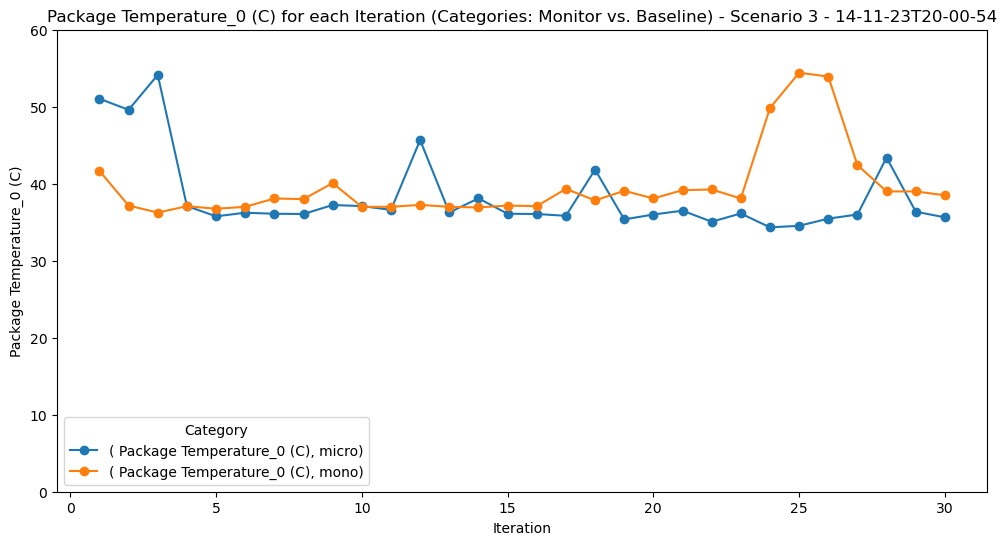

In [94]:
filtered_df = df[~df["File"].str.contains("baseline")]
filtered_df = filtered_df[~filtered_df["File"].str.contains("frontend")]


pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values=" Package Temperature_0 (C)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Package Temperature_0 (C)")

plt.title("Package Temperature_0 (C) for each Iteration (Categories: Monitor vs. Baseline) - " + datetime)
plt.legend(title="Category")

plt.ylim(0, 60)

plt.savefig(os.path.join(output_directory, 'sum_temp' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()

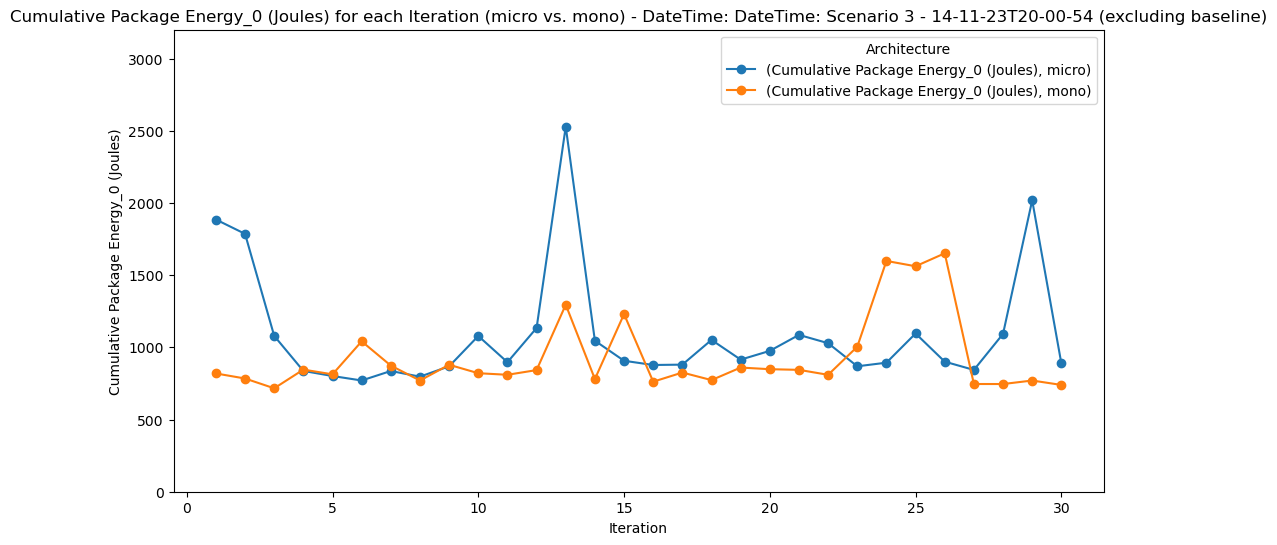

In [95]:
filtered_df = df[~df["File"].str.contains("baseline")]

pivoted_df = filtered_df.pivot_table(index=["#", "Architecture"], values="Cumulative Package Energy_0 (Joules)", aggfunc="sum").unstack()

pivoted_df.plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Iteration")
plt.ylabel("Cumulative Package Energy_0 (Joules)")

# plt.ylim(0,1000)
plt.ylim(0,3200)


plt.title("Cumulative Package Energy_0 (Joules) for each Iteration (micro vs. mono) - DateTime: DateTime: " + datetime + " (excluding baseline)")
plt.legend(title="Architecture")
# plt.show()

plt.savefig(os.path.join(output_directory, 'energy' + datetime + '.png'), bbox_inches='tight', dpi=300)
plt.show()